<a href="https://colab.research.google.com/github/srijapamu25/Project-2/blob/main/Opportunity_data_(Week_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np

**Loading the dataset**

In [ ]:
df = pd.read_csv('/https://drive.google.com/file/d/1xLvsDSMTv7PrhKpXQao1yp5wEP4U91is/view.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/https://drive.google.com/file/d/1xLvsDSMTv7PrhKpXQao1yp5wEP4U91is/view.csv'

In [ ]:
# shape
df.shape
df.info()

NameError: name 'df' is not defined

In [ ]:
# checking data types
df.dtypes

,0
Profile Id,object
Opportunity Id,object
Opportunity Name,object
Opportunity Category,object
Opportunity End Date,object
Gender,object
City,object
State,object
Country,object
Zip Code,object


In [ ]:
# checking missing values
df.isnull().sum()

,0
Profile Id,0
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,0
Gender,1
City,1
State,14
Country,0
Zip Code,13


In [ ]:
# duplicate rows
df.duplicated().sum()

0

In [ ]:
df.describe()

,Reward Amount,Skill Points Earned
count,2521.000000,2521.000000
mean,1081.261404,1186.964697
std,927.251398,399.172150
min,50.000000,10.000000
25%,500.000000,1182.000000
50%,500.000000,1182.000000
75%,2500.000000,1182.000000
max,2500.000000,1776.000000


In [ ]:
# unique values
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} unique values")

Profile Id: 11481 unique values
Opportunity Id: 33 unique values
Opportunity Name: 33 unique values
Opportunity Category: 5 unique values
Opportunity End Date: 29 unique values
Gender: 4 unique values
City: 3141 unique values
State: 1370 unique values
Country: 108 unique values
Zip Code: 5189 unique values
Graduation Date(YYYY MM): 321 unique values
Current Student Status: 4 unique values
Current/Intended Major: 968 unique values
Status Description: 8 unique values
Apply Date: 20277 unique values
Opportunity Start Date: 51 unique values
Badge Id: 56 unique values
Badge Name: 56 unique values
Skills Earned: 24 unique values


**DATA CLEANING**

**Handling Missing Values**

In [ ]:
# Filling missing values with '0'
reward_cols = ["Reward Amount", "Badge Id", "Badge Name", "Skills Earned"]
df[reward_cols] = df[reward_cols].fillna(0)

In [ ]:
# converting Opportunity Start Date to datetime
df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'])

In [ ]:
# Filling missing categorical values with mode
categorical_cols = ["City", "State", "Zip Code", "Gender"]
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-11-71f591a818e9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Standardizing city names
df["City"] = df["City"].str.lower().str.strip()
df["City"] = df["City"].replace({"st. louis": "saint louis", "nyc": "new york city"})

In [ ]:
# Ensuring dates are in proper format
df["Opportunity Start Date"] = pd.to_datetime(df["Opportunity Start Date"]).dt.strftime('%Y-%m-%d')

In [ ]:
# Removing invalid majors
df = df[df["Current/Intended Major"].str.match(r'^[a-zA-Z\s]+$', na=True)]

In [ ]:
# Removing duplicates
df = df.drop_duplicates()

**DATA VALIDATION**

In [ ]:
# Converting Gender Category
df["Gender"] = df["Gender"].str.lower().str.strip()
df["Gender"] = df["Gender"].replace({"male": "m", "female": "f"})

In [ ]:
df.loc[df["Status Description"] != "Rewards Awarded", ["Reward Amount", "Skill Points Earned"]] = 0

**Validating Numeric Data**

In [ ]:
# Converting Numeric columns
df["Reward Amount"] =pd.to_numeric(df["Reward Amount"], errors="coerce")
df["Skill Points Earned"] = pd.to_numeric(df["Skill Points Earned"], errors="coerce")

In [ ]:
# Removing Negative values
df = df[(df["Reward Amount"] >= 0) & (df["Skill Points Earned"] >= 0)]

In [ ]:
# Cross-check business logic
invalid_rewards = df[(df["Status Description"] != "Rewards Awarded") & (df["Reward Amount"] > 0)]
print(f"Invalid reward cases: {len(invalid_rewards)}")

Invalid reward cases: 0


In [ ]:
# Cleaned Data set
df_cleaned = df
df_cleaned.to_csv("cleaned_data.csv", index=False)

***EXPLORATORY DATA ANALYSIS (EDA)***

***Import Libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

# Setting up visual style
sns.set(style="whitegrid")


***Load Cleaned Data***

In [ ]:
df_cleaned = pd.read_csv('/content/cleaned_data.csv')

print("Dataset Shape:", df_cleaned.shape)
display(df_cleaned.head())


Dataset Shape: (20322, 21)


,Profile Id,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,Gender,City,State,Country,Zip Code,...,Current Student Status,Current/Intended Major,Status Description,Apply Date,Opportunity Start Date,Reward Amount,Badge Id,Badge Name,Skill Points Earned,Skills Earned
0,31ce84c2-2bd1-40ba-b2d8-f164fe125306,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,dhaka,Savar,Bangladesh,1342,...,High School Student,Data Science,Not Started,"Oct 03, 2022, 17:29:17",2023-01-05,0.0,0,0,0.0,0
1,36814990-f854-4f76-8c63-91f27567d080,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,amritsar,Punjab,Afghanistan,123242,...,Undergraduate Student,Otheraassss,Rewards Award,"Jan 05, 2023, 18:58:37",2023-01-05,0.0,00000000-0GSP-A3RB-BT5G-1ECTG9,Statement of Purpose (SOP) Writing Workshop,0.0,"[""Critical Thinking"",""Creative Thinking"",""Comm..."
2,8154328c-f8fe-4bd1-af05-783e140f68b5,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",f,satna,Madhya pradesh,India,485001,...,High School Student,Computer Science and Engineering,Not Started,"Oct 04, 2022, 08:10:07",2023-01-05,0.0,0,0,0.0,0
3,a83abad6-db1e-44c4-a8f4-9e397e282d73,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,hyderabad,Telangana,India,500039,...,Graduate Program Student,Computer Science,Not Started,"Oct 05, 2022, 13:41:47",2023-01-05,0.0,0,0,0.0,0
4,c2b8a15f-2ba3-41e4-a553-7ca68b0d4a54,00000000-0G4F-19XB-EXPW-KS8F3N,Statement of Purpose (SOP) Writing Workshop,Event,"Jan 05, 2023, 18:58:39",m,bangalore,Karnataka,India,560105,...,Undergraduate Student,jknhk,Not Started,"Oct 05, 2022, 11:07:17",2023-01-05,0.0,0,0,0.0,0


In [ ]:
print("\nMissing Values:")
print(df_cleaned.isnull().sum())
print("\nDescriptive Statistics:")
display(df_cleaned.describe())


Missing Values:
Profile Id                    0
Opportunity Id                0
Opportunity Name              0
Opportunity Category          0
Opportunity End Date          0
Gender                        0
City                          0
State                         0
Country                       0
Zip Code                      0
Graduation Date(YYYY MM)      1
Current Student Status        1
Current/Intended Major       44
Status Description            0
Apply Date                    0
Opportunity Start Date      804
Reward Amount                 0
Badge Id                      0
Badge Name                    0
Skill Points Earned           0
Skills Earned                 0
dtype: int64

Descriptive Statistics:


,Reward Amount,Skill Points Earned
count,20322.0,20322.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


***Data Visualization***

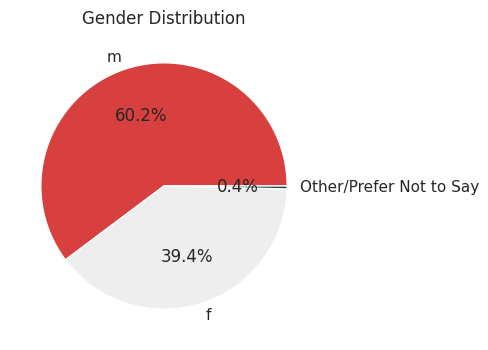

In [ ]:
# Ensure numeric dtype
df_cleaned["Reward Amount"] = df_cleaned["Reward Amount"].astype(float)
df_cleaned["Skill Points Earned"] = df_cleaned["Skill Points Earned"].astype(float)

# Merge "Other" and "Don't Want to Specify" into one category
df_cleaned["Gender"] = df_cleaned["Gender"].replace(
    ["other", "don't want to specify"], "Other/Prefer Not to Say"
)

### Gender Distribution ###
plt.figure(figsize=(6, 4))
gender_counts = df_cleaned["Gender"].value_counts()
plt.pie(
    gender_counts, labels=gender_counts.index, autopct="%1.1f%%",
    colors=["#D84040", "#EEEEEE", "#16404D"]
)
plt.title("Gender Distribution")
plt.show()

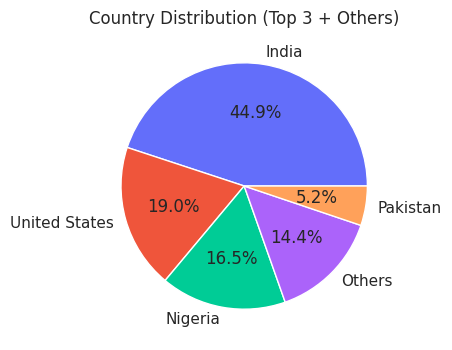

In [ ]:
# Country Distribution

# Identify top 3 countries before modifying the dataset
top_countries = df_cleaned["Country"].value_counts().nlargest(4).index.tolist()

# Create a new column to avoid modifying the original data
df_temp = df_cleaned["Country"].copy()
df_temp = df_temp.apply(lambda x: x if x in top_countries else "Others")

# Count occurrences again after categorizing "Others"
country_counts = df_temp.value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(
    country_counts, labels=country_counts.index, autopct="%1.1f%%",
    colors=px.colors.qualitative.Plotly
)
plt.title("Country Distribution (Top 3 + Others)")
plt.show()

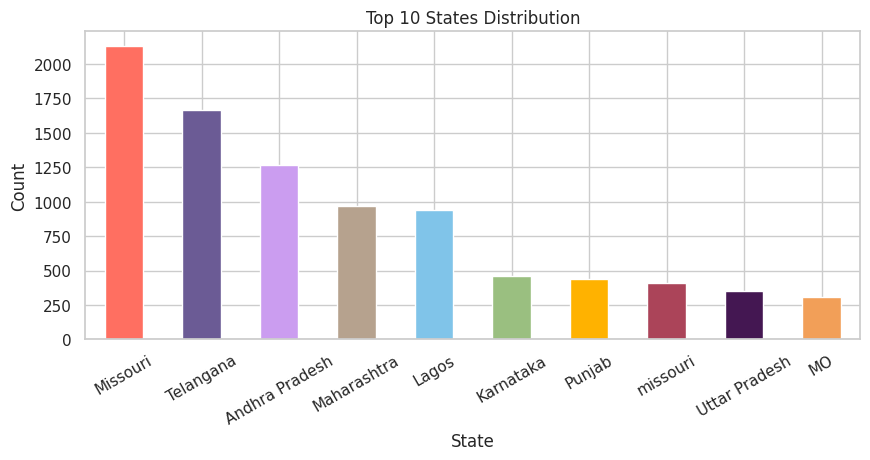

In [ ]:
# Top 10 States Distribution
plt.figure(figsize=(10, 4))
top_states = df_cleaned["State"].value_counts().nlargest(10)

# Assign different colors using a color palette
colors = ["#FF6F61", "#6B5B95", "#CB9DF0", "#B6A28E", "#80C4E9",
          "#9ABF80", "#FFB200", "#AB4459", "#441752", "#F29F58"]

top_states.plot(kind="bar", color=colors)
plt.title("Top 10 States Distribution")
plt.xlabel("State")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.show()


In [ ]:
# Optimized Categorical Visualizations
# City Distribution (Top 10 Cities - Treemap)
top_cities = df_cleaned["City"].value_counts().nlargest(10)
fig = px.treemap(df_cleaned[df_cleaned["City"].isin(top_cities.index)], path=["City"], title="Top 10 Cities Distribution")
fig.show()


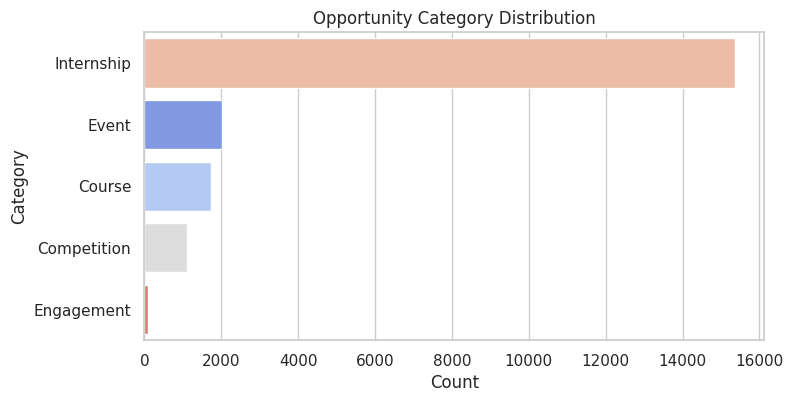

In [ ]:
# Opportunity Category Distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, y="Opportunity Category", order=df_cleaned["Opportunity Category"].value_counts().index, hue="Opportunity Category", legend=False, palette="coolwarm")
plt.title("Opportunity Category Distribution")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


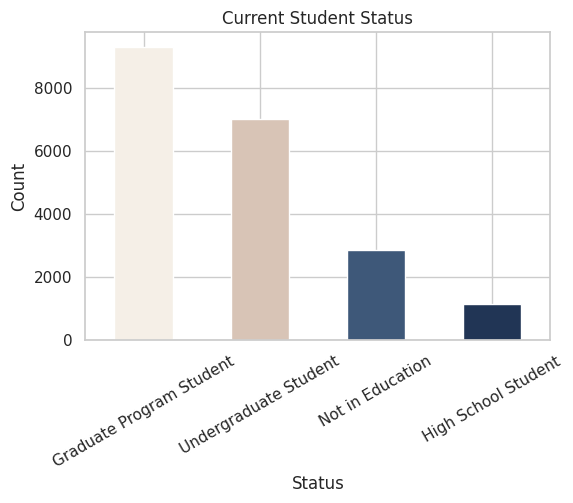

In [ ]:
# Current Student Status
plt.figure(figsize=(6, 4))
df_cleaned["Current Student Status"].value_counts().plot(kind="bar", color=["#F5EFE7", "#D8C4B6", "#3E5879", "#213555"])
plt.title("Current Student Status")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

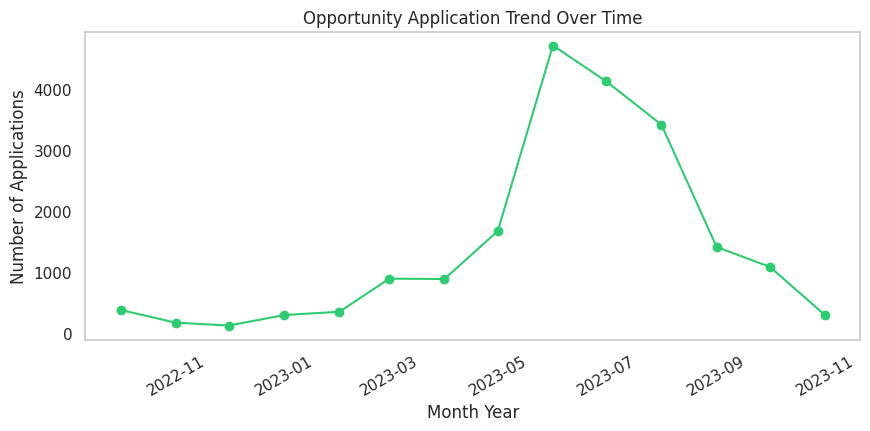

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df_cleaned["Apply Date"] = pd.to_datetime(df_cleaned["Apply Date"], errors="coerce")

# Extract "Year" and "Month Year" for sorting and display
df_cleaned["Apply Year"] = df_cleaned["Apply Date"].dt.year
df_cleaned["Apply Month Year"] = df_cleaned["Apply Date"].dt.to_period("M")  # "2023-09"

# Aggregate application counts per month
df_trend = df_cleaned.groupby("Apply Month Year").size().reset_index(name="Count")

# Convert "Apply Month Year" back to a datetime format for plotting
df_trend["Apply Month Year"] = df_trend["Apply Month Year"].dt.to_timestamp()

# Plot the trend
plt.figure(figsize=(10, 4))
plt.plot(df_trend["Apply Month Year"], df_trend["Count"], marker="o", linestyle="-", color="#2ecc71")

plt.title("Opportunity Application Trend Over Time")
plt.xlabel("Month Year")
plt.ylabel("Number of Applications")
plt.xticks(rotation=30)
plt.grid()
plt.show()


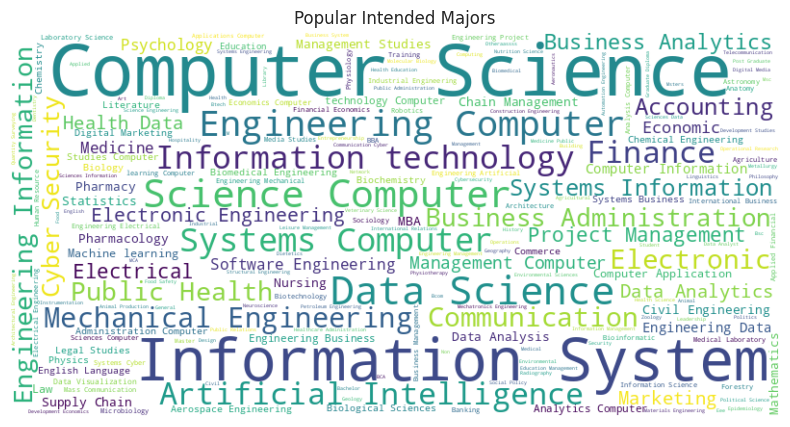

In [ ]:
# Current/Intended Major - Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df_cleaned["Current/Intended Major"].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Popular Intended Majors")
plt.show()

# ***EDA - KEY INSIGHTS***

# **1️⃣ Data Quality & Missing Values**
**Minimal missing data in Cleaned_Opportunity_wise_data.csv, with only a few records affected:**

* Graduation Date (1) and Current Student Status (1) are nearly complete.
* Opportunity Start Date (804) and Badge Id (2521) have notable gaps.
* Current/Intended Major (44) has some missing values but is mostly complete.
* Reward Amount and Skill Points Earned have only zeros, suggesting either missing reward data or opportunities not offering tangible rewards.

# **2️⃣ Demographic Breakdown**
**Gender Distribution:**

Male applicants dominate (60.2%), followed by Females (39.4%) and a small percentage of Other/Prefer Not to Say (0.4%).

**Country Distribution:**

India leads (44.9%), followed by United States (19.0%) and Nigeria (16.5%).
"Others" category (19.6%) represents a mix of multiple smaller participant countries.

**State Distribution (Top 10):**

Missouri (US) dominates, followed by Telangana, Andhra Pradesh, and Maharashtra (India) and Lagos (Nigeria).

**City Distribution (Top 10):**

Saint Louis (US) and Hyderabad (India) lead, followed by Lagos, Chennai, Pune, and Mumbai.

# **3️⃣ Education & Student Status**
**Graduation Trends:**

The dataset skews towards recent graduates, with graduate program students being the highest in number.

**Current Student Status:**

* Graduate Program students dominate, followed by Undergraduate students and a small proportion of High School students.
* A significant "Not in Education" group implies participation from professionals or career switchers.

**Popular Intended Majors (Word Cloud Analysis):**

Computer Science, Data Science, AI, and Engineering majors dominate, aligning with high-tech career paths.

# **4️⃣ Opportunity & Reward Trends**
**Opportunity Category Breakdown:**

* Internships receive the highest applications, followed by Events, Courses, Competitions, and Engagement activities.
* Internships are the top choice, reflecting career-focused participation.

**Reward & Skill Points:**
* All "Reward Amount" values are 0, indicating either unpaid opportunities or missing reward details.
* Skill Points Earned also remain at 0, making it unclear if this metric is being actively tracked.

# **5️⃣ Time-Based Application Trends**

**Seasonal Patterns:**

* Highest application spike in June 2023, possibly due to summer internships and academic breaks.
* The trend line follows an expected academic cycle, with peaks aligning with internship deadlines and course enrollments.